<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793038-Jonathan_Garza/blob/main/Actividades%20Semana%207/Actividad_de_semana_7_Visualizacion_Jonathan_Garza_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico y de Estudios Superiores de Monterrey**

Maestría en Inteligencia Artificial Aplicada (MNA)

Ciencia y Analítica de Datos

**Actividad de Semana 7: Visualización**

**Jonathan Garza Bennet - A01793038**

In [44]:
#Se importan todas las librerías requeridad para los ejercicios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

1. **Descarga los datos y carga el dataset en tu libreta.**

In [9]:
#Establecer la url de donde se descargará el archivo csv para los ejercicios
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

#Descargar el archivo, asignarlo a un dataframe y asignar el nombre deseado de las columnas.
df = pd.read_csv(path, index_col=0)

2. **Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()**

In [10]:
#Visualizar el encabezado del archivo
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [11]:
#Se imprime la forma del DataFrame
df.shape

(30000, 24)

In [12]:
#Se imprimen los nombres de las columnas
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [13]:
#Se imprimen los tipos de datos del DataFrame
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [14]:
#Se imprime la infomación del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [15]:
#Se imprime La cantidad de datos vacíos por columna del DataFrame
df.isna().sum()

X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

3. **Limpia los datos eliminando los registros nulos o rellena con la media de la columna**

In [19]:
#Se crea un nuevo DataFrame para realizar las imputaciones
df_filled = df.copy()

#Se buscan todos los valores vacíos en todas las columnas y se reemplazan por la media
for column in df_filled.columns:
  df_filled[column].fillna(value = df_filled[column].mean(), inplace = True)

#Se verifica que ya no haya columnas con datos vacíos
df_filled.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

4. **Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión**

In [21]:
#Se describe la base de datos
df_filled.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489117,0.790293,0.521950,9.217256,1.123773,1.197154,1.195908,1.168977,1.132994,...,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415034
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


***Se puede observar que los datos tienen escalas de magnitudes muy diferentes las cuales se deben de tomar en cuenta al momento de analizar las medidas de tendencia central. Se observa que en la mayoría de ellos, existe una gran dispersion debido a que la maginitud de la media es muy parecida a la de desviación estándar, lo que indica que los datos no se encuetran concentrados cerca de un mismo valor central.***

5. **Realiza el conteo de las variables categóricas**

Se tiene la siguiente descripción del DataFrame:

**X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**X4**: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

**X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

**X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Las Variables categóricas son:

**X2**, **X3**, **X4**, **X5**, **X6 - X11**

In [24]:
#Se crea una lista con las variables categóricas
columns_categorical = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

#Se realiza la cuenta de las variables categóricas
df_filled[columns_categorical].nunique()

X2      3
X3      8
X4      5
X6     12
X7     12
X8     12
X9     12
X10    11
X11    11
dtype: int64

6. **Escala los datos, si consideras necesario**

Debido a las diferencias de magnitud encontradas, se realiza un escalamiento de datos con ayuda de la función StandardScaler

In [27]:
#Se escala el dataframe y se asigna a una nueva variable
df_scaled = StandardScaler().fit_transform(df_filled)

#Se convierten los resultados nuevamente a un DataFrame de Pandas
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

#Se muestra el encabezado
df_scaled.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.136720,0.810140,0.185938,-1.057405,-1.245968,1.794552,1.782331,-0.697050,-0.666577,-1.530182,...,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201,-0.293426,1.876533
1,-0.365981,0.810140,0.185938,0.858519,-1.028980,-0.875071,1.782331,0.139148,0.188886,0.235082,...,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201,-0.180922,1.876533
2,-0.597202,0.810140,0.185938,0.858519,-0.161028,0.014803,0.111674,0.139148,0.188886,0.235082,...,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747,-0.012165,-0.532951
3,-0.905498,0.810140,0.185938,-1.057405,0.164454,0.014803,0.111674,0.139148,0.188886,0.235082,...,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230,-0.237174,-0.532951
4,-0.905498,-1.234395,0.185938,-1.057405,2.334333,-0.875071,0.111674,-0.697050,0.188886,0.235082,...,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103,-0.255231,-0.532951


7. **Reduce las dimensiones con PCA, si consideras necesario.**

Debido al grán número de entradas, se considera necesario realizar una transformación a las componentes principales para ver si existen oportunidades de reducción de dimensiones y simplificar los modelos.

**7.1 Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%**

In [35]:
#Se asigna el método a una variable
PCS = PCA()

#Se transforma el DataFrame por medio de la método PCA y se asigna a una nueva variable
df_scaled_PCA = PCS.fit_transform(df_scaled)

# Revisamos la varianza que existe en cada componente y la acumulada
df_PCA_Summary = pd.DataFrame({
'% Varianza PC': np.round(PCS.explained_variance_ratio_,4),
'% varianza Acumulada': np.round(np.cumsum(PCS.explained_variance_ratio_),4)
})

PCA_labels = [f'PC{i + 1}' for i in range(len(df_scaled.columns))]
df_PCA_Summary.index = PCA_labels

df_PCA_Summary

,% Varianza PC,% varianza Acumulada
PC1,0.2730,0.2730
PC2,0.1750,0.4480
PC3,0.0647,0.5127
PC4,0.0615,0.5742
PC5,0.0434,0.6175
PC6,0.0406,0.6581
PC7,0.0382,0.6963
PC8,0.0378,0.7341
PC9,0.0369,0.7710
PC10,0.0363,0.8073


Se logra un acumulado de varianza superior al 70% a partir de PC8 como se indica en las instrucciones.

**7.2 Indica la importancia de las variables en cada componente**

In [37]:
# Revisamos la relación de cada componente con las variables iniciales
df_scaled_PCA = pd.DataFrame(df_scaled_PCA, columns = PCA_labels)

df_relevant = pd.DataFrame(
    PCS.components_.round(2), 
    columns = df_scaled_PCA.columns,
    index = df_scaled.columns
)
# Imprimimos los componentes de interes PC1-PC14
relevant_pcs = df_relevant.iloc[:,:8]

relevant_pcs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
X1,0.07,-0.02,0.02,-0.01,0.01,0.16,0.20,0.20
X2,0.31,0.03,-0.09,-0.04,0.06,-0.30,-0.33,-0.33
X3,0.01,0.03,-0.32,0.47,-0.48,-0.02,0.02,0.06
X4,0.08,-0.08,0.23,-0.43,0.45,0.02,0.05,0.08
X5,-0.20,0.74,0.45,-0.03,-0.14,-0.11,-0.05,-0.00
X6,-0.27,-0.63,0.39,0.23,0.01,-0.14,-0.06,-0.02
X7,-0.26,0.01,0.41,0.19,-0.14,0.22,0.04,-0.09
X8,0.05,0.07,-0.32,-0.12,0.05,-0.03,-0.08,-0.05
X9,-0.03,-0.05,0.05,0.01,0.01,-0.04,0.01,-0.01
X10,0.02,0.02,-0.16,-0.06,0.05,-0.03,-0.03,-0.01


Del DataFrame anterior, las variables con mayor importancia para cada componente son las siguientes:

In [38]:
#Se extraen las columnas
columnas=relevant_pcs.columns

#Se crea una lista vacía
lista_idx_min_max={}

#Ciclo for para buscar en cada una de las componentes
for column in columnas:

  #Se crea una lista para buscar asignar los valores de la columna
  lista=relevant_pcs[column].values

  #Se busca el valor máximo de la columna
  min_value = relevant_pcs[column].min()

  #Se busca el valor máximo de la columna
  max_value = relevant_pcs[column].max()

  #Se busca la posición del valor mínimo
  index_number_min = np.where(lista == min_value)

  #Se busca la posición del valor máximo
  index_number_max = np.where(lista == max_value)

  #Se obtiene el ínidice del mínimo
  idx_minimo=relevant_pcs.index[index_number_min]

  #Se obtiene el ínidice del máximo
  idx_maximo=relevant_pcs.index[index_number_max]

  #Se agregan los valores al diccionario correspondiente a la columna actual
  lista_idx_min_max[column]=[idx_minimo[0], min_value, idx_maximo[0], max_value]

#Se modifican los valores de los índices para mejor claridad
df_max_min_var=pd.DataFrame(lista_idx_min_max,index=['Min Var Param','Valor Min Var','Max Var Param','Valor Max Var'])

#Se despliega el dataframe correspondiente
df_max_min_var

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Min Var Param,X15,X6,X15,X4,X3,X16,X19,X2
Valor Min Var,-0.75,-0.63,-0.37,-0.43,-0.48,-0.64,-0.49,-0.33
Max Var Param,X14,X5,X5,X14,X14,X13,X17,X19
Valor Max Var,0.35,0.74,0.45,0.64,0.57,0.51,0.56,0.61


8. **Elabora los histogramas de los atributos para visualizar su distribución**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdea97a5950>,
      dtype=object)

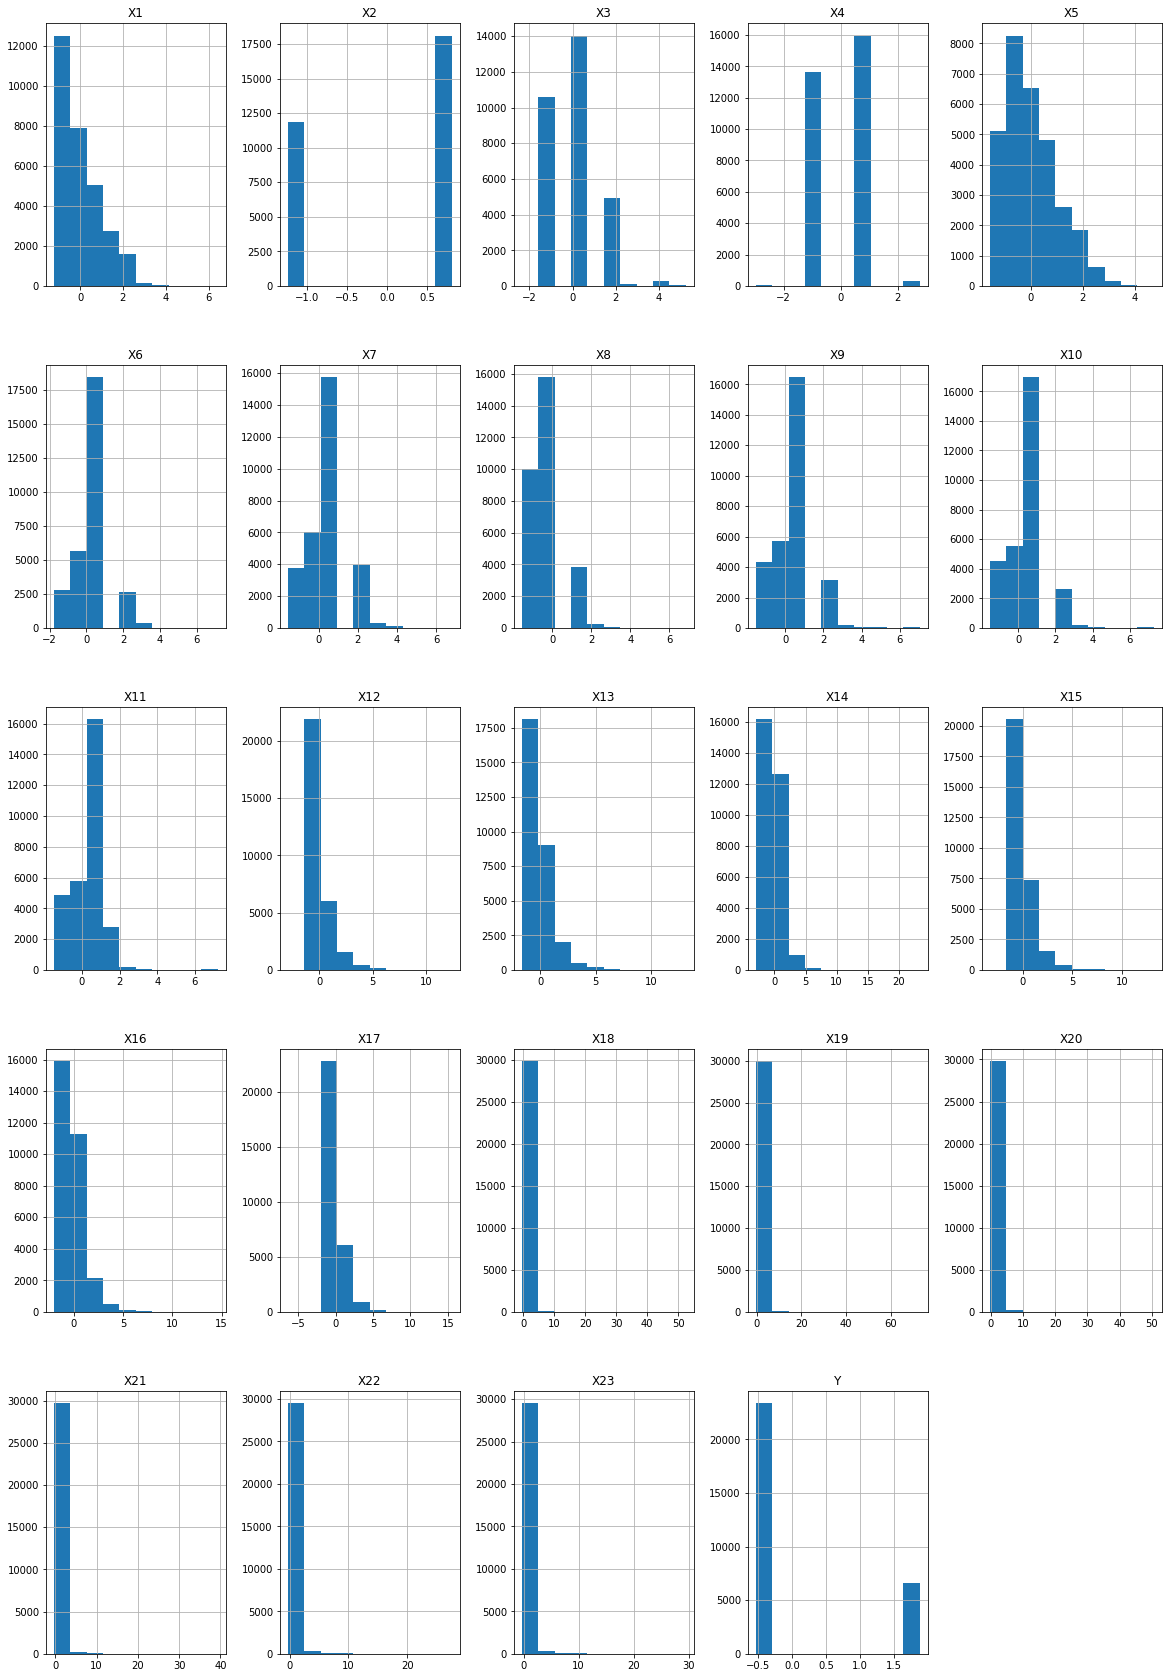

In [42]:
#Se realiza histograma con las variables escaladas antes de la transformación a PC
df_scaled.hist(figsize=(20,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdea7180f10>,
      dtype=object)

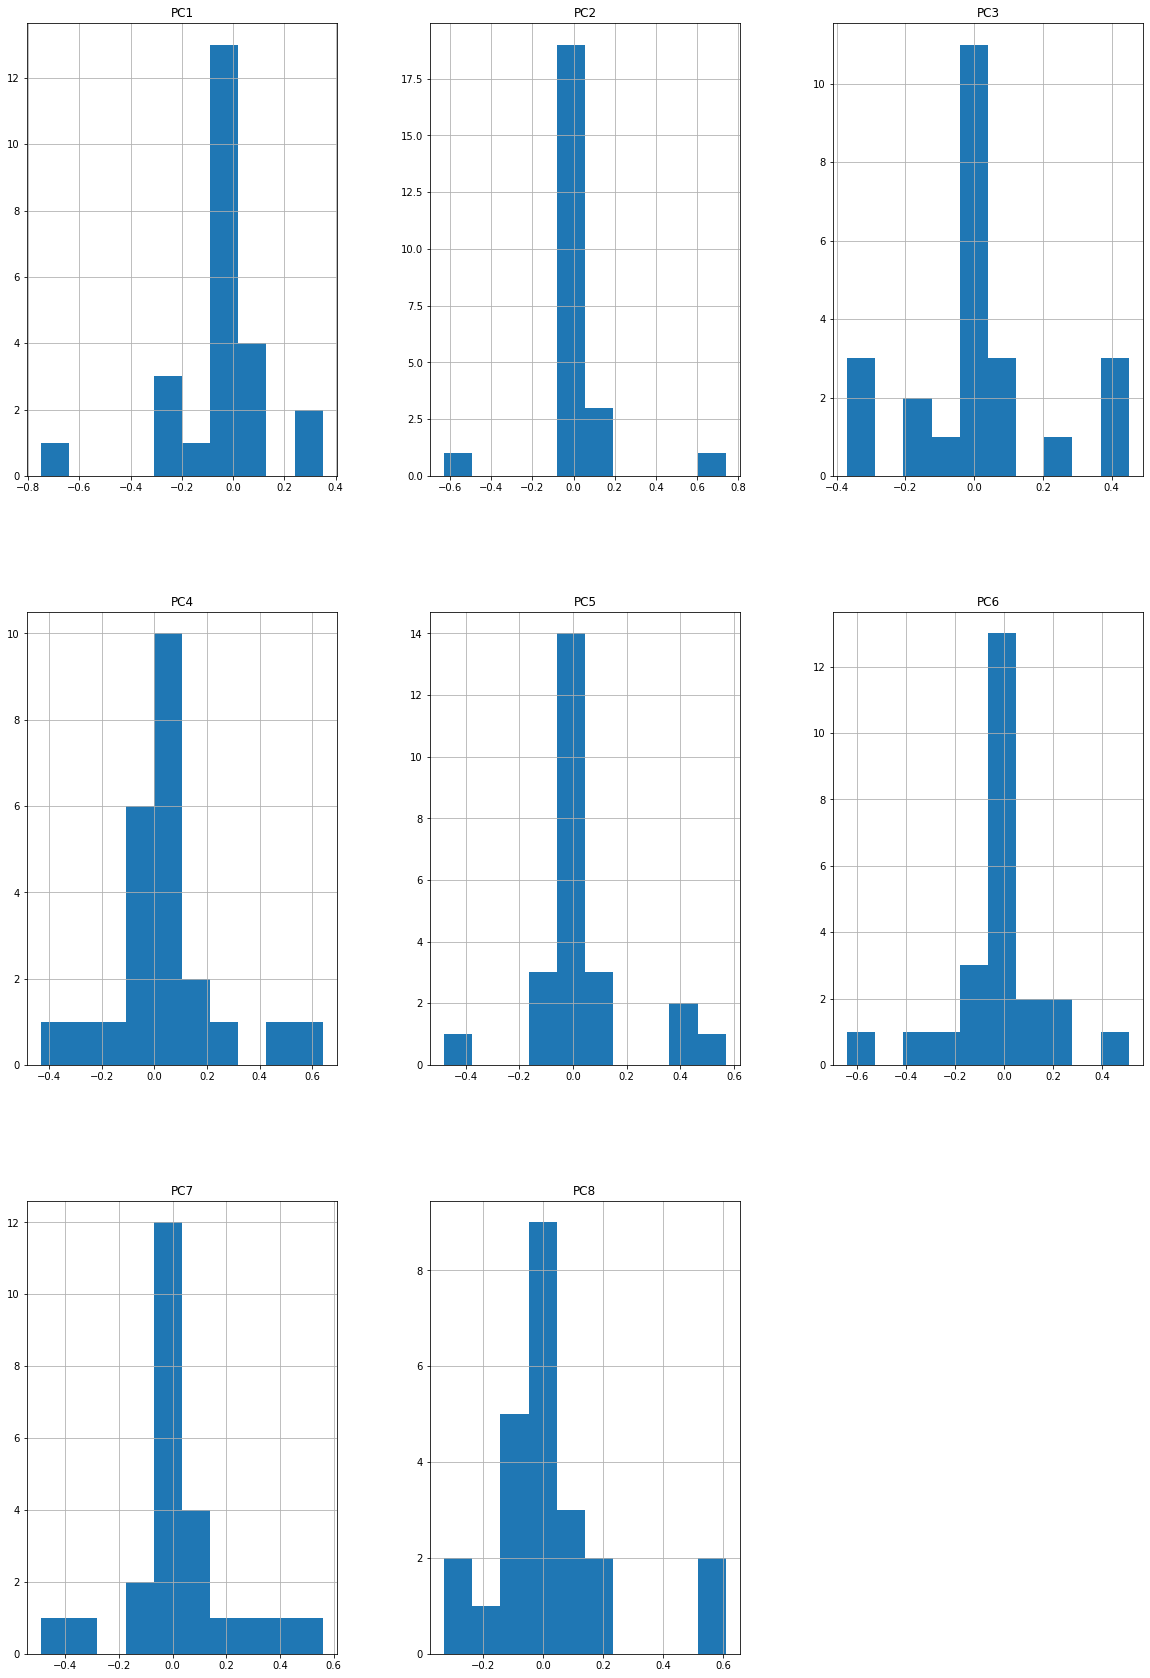

In [43]:
#Se realiza histograma con las variables escaladas después de la transformación a PC
relevant_pcs.hist(figsize=(20,30))

Se puede observar que la distribución de los histogramas de las componentes principales, se encuentra distribuida con mucho más uniformidad hacia los valores centrales.

9. **Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.**

**Bar Chart** (para este caso en específico se llama Scree)

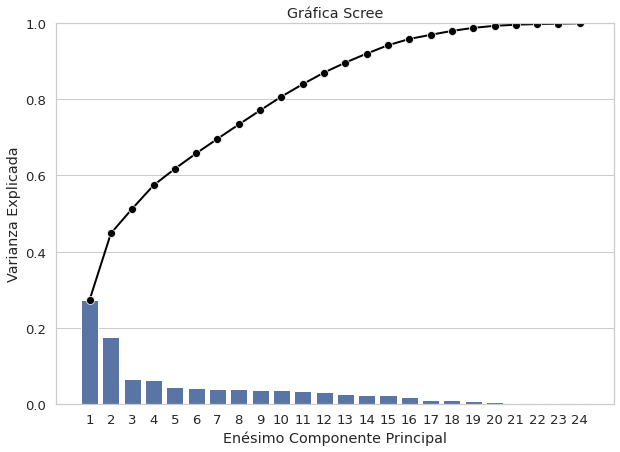

In [45]:
#Se realiza la gráfica Scree

PC_components = np.arange(PCS.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = PCS.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(PCS.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Gráfica Scree')
plt.xlabel('Enésimo Componente Principal')
plt.ylabel('Varianza Explicada')
plt.ylim(0, 1)
plt.show()

**Mapa de Calor**

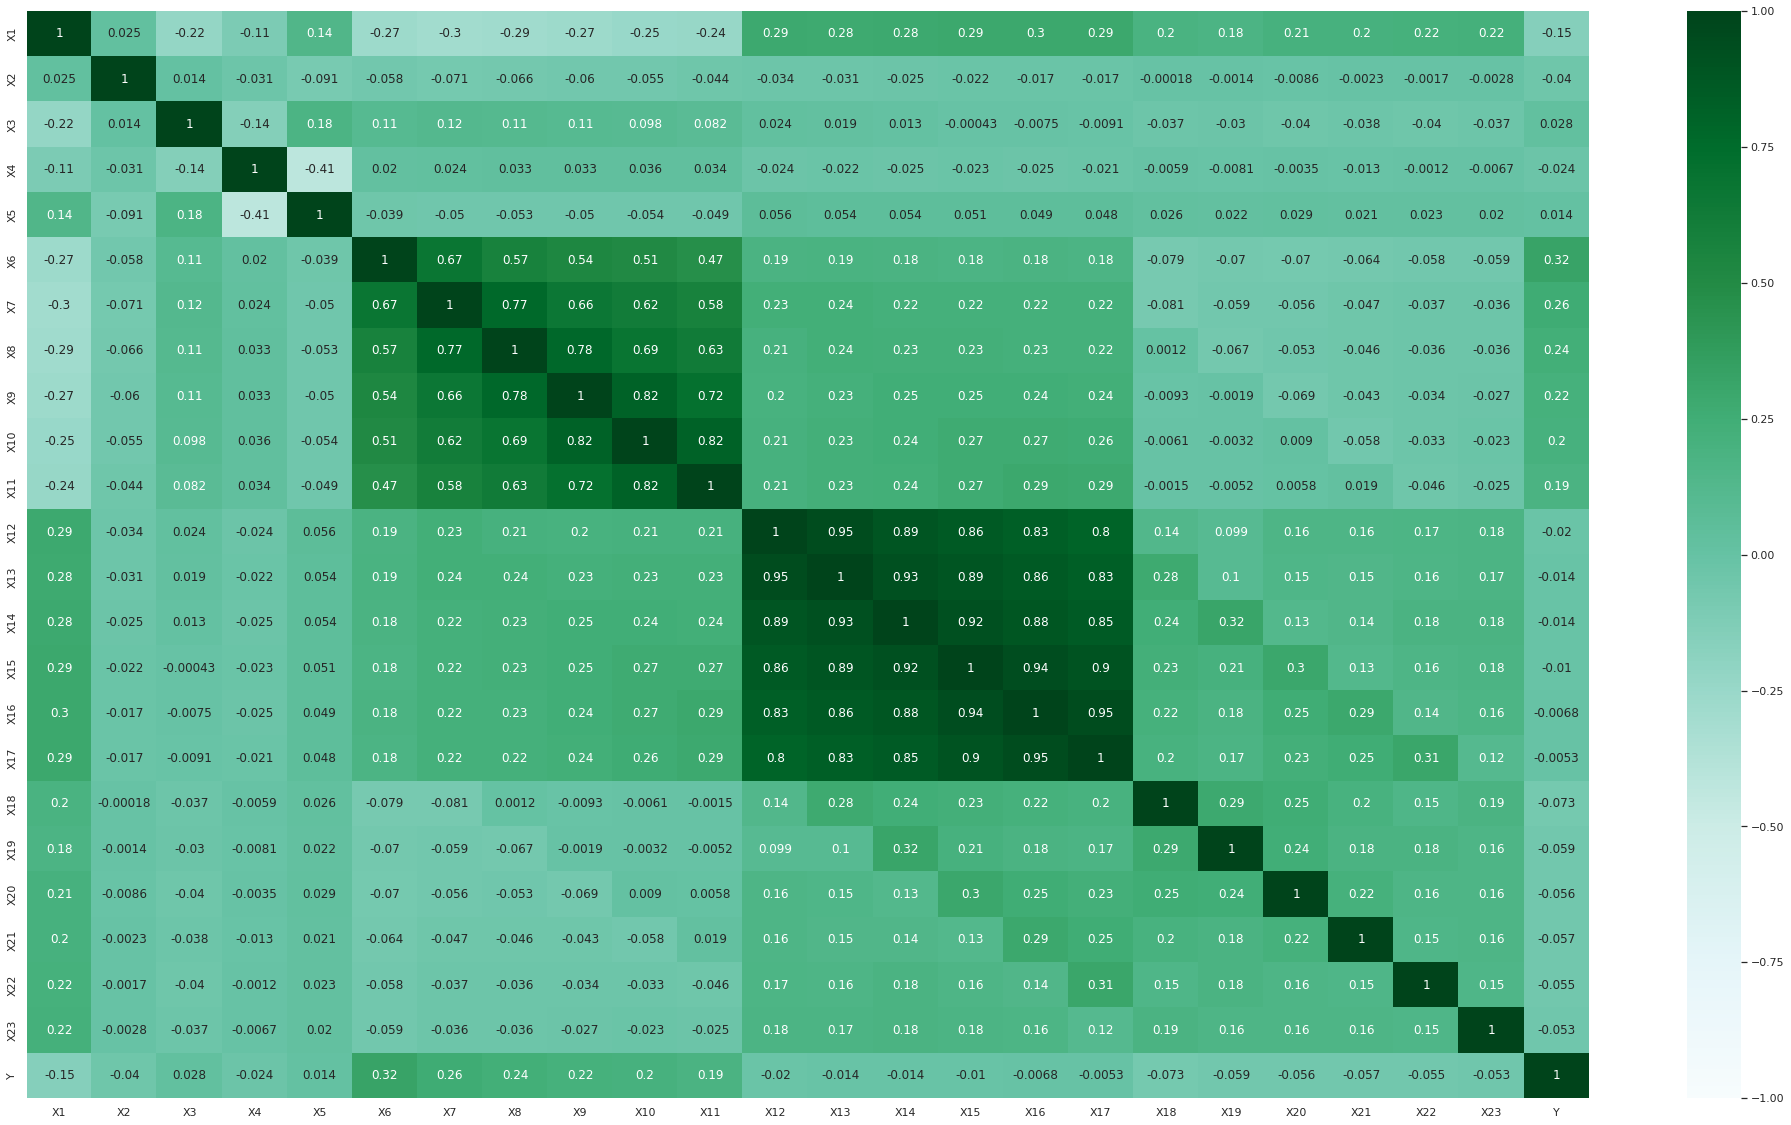

In [47]:
#Se realiza un ejercio de correlación entre todas las variables
df_corr = df.corr()

#Se construye y despliega un mapa de calor para una visualización más simple
sns.set(rc ={'figure.figsize':(35,20)})
sns.heatmap(df_corr, vmin = -1, vmax = 1, cmap = "BuGn", annot=True)

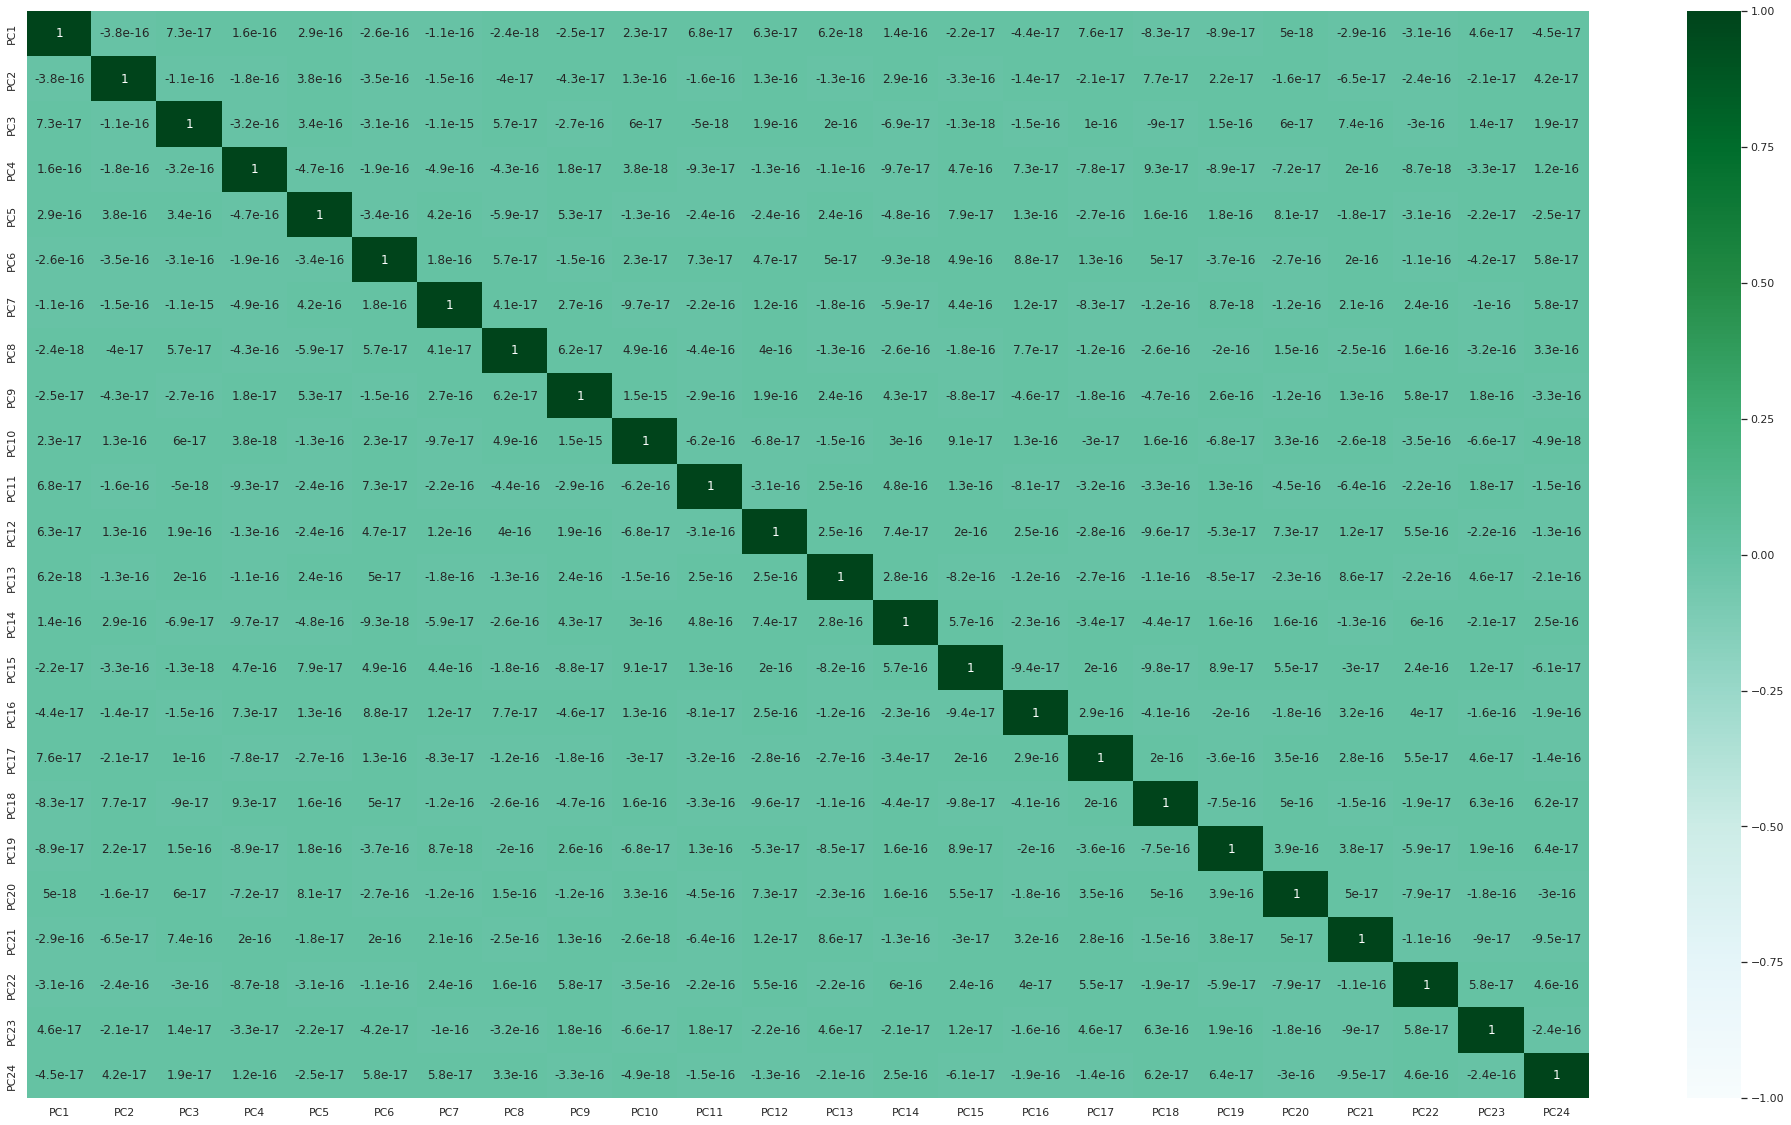

In [46]:
#Se realiza un ejercio de correlación entre todas las componentes principales
df_scaled_PCA_corr = df_scaled_PCA.corr()

#Se construye y despliega un mapa de calor para una visualización más simple
sns.set(rc ={'figure.figsize':(35,20)})
sns.heatmap(df_scaled_PCA_corr, vmin = -1, vmax = 1, cmap = "BuGn", annot=True)

**Scatter Plot**

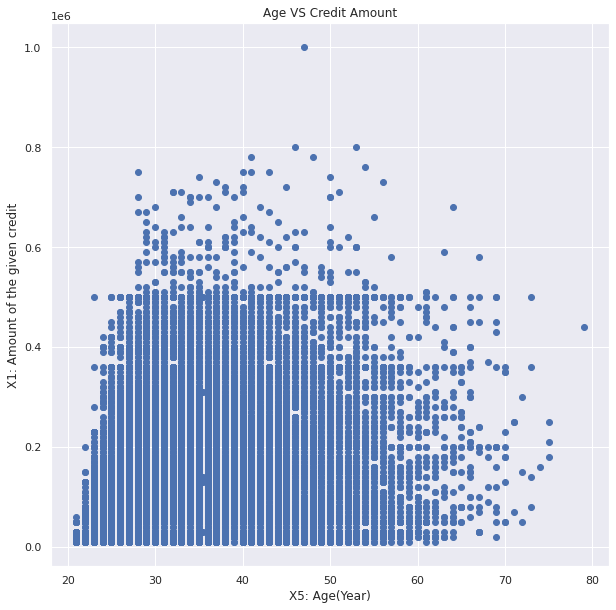

In [56]:
#Se declara una lista vacía para guardar sólo los resultados de recall de proceso de entrenamiento
sns.set(rc={'figure.figsize':(10,10)})
plt.scatter(df_filled['X5'], df_filled['X1'])
plt.xlabel('X5: Age(Year)')
plt.ylabel('X1: Amount of the given credit')
plt.title('Age VS Credit Amount')
plt.show()

10. **Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.**

***Gráfico 1: Bar Chart***

En este caso se presenta como Scree Plot. Ayuda a visualizar el acumulado de varianza resultante de la transformación a componentes principales. Ayuda a determinar cuantas componentes pueden ser removidas conservando la mayoría de la varianza del conjunto de datos original y por lo tanto a reducir dimensiones.

***Gráfico 2: Heat Map***

Nos ayuda a visualizar de forma más sencilla un mapa de datos numéricos con el objetivo facilitar el análisis de su magnitud. En este caso se construyen dos acerca de la correlación de entre las componentes originales y principales. En el primer caso existe evidencia de correlación entre los parámetros, caso contrario del segundo que muestra que sólo la diagonal principal presenta correlación, demostrando que la proyección a las componentes principales presentan ortogonalidad.

***Gráfico 3: Scatterplot***

Se busca determinar de forma visual si existe una correlación entre la edad del cliente y el crédito aprobado. En este caso, no se observa ninguna correlación entre éstos dos, lo que demuestra que la edad no es un buen predictor de la cantidad de crédito autorizado.